2 hidden layer, 392 neruon for each layer  
1. load the mnist data
2. read into train_set and test_set
3. visualize the data[train data]
4. format the input data -> [reshape]  (x_train/test.shape[test case quantity],feature_size[pixel number])
5. normalize the input data(将原来的颜色映射到0-1)
6. format the output data [to_catagorical]  数字分类
7. set up model
8. comfigure/compile the model
9. train the model
10. evaluate the model train [accuracy_score]
11. evaluate the model test [accuracy_score]

In [118]:
from tensorflow.keras.datasets import mnist
(x_test,y_test),(x_train,y_train) = mnist.load_data()
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)


(28, 28)


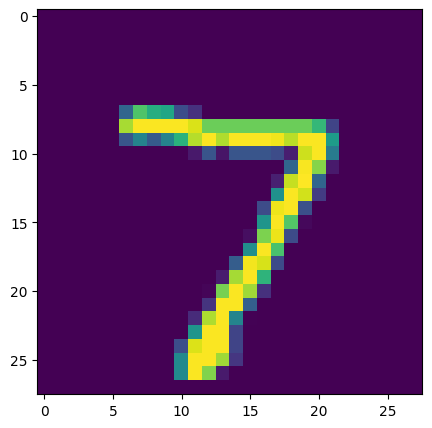

In [119]:
%matplotlib inline
from matplotlib import pyplot as plt
img1 = x_train[0]
print(x_train[0].shape)
plt.figure(figsize=(5,5))
plt.imshow(img1)

In [120]:
# formalize the data
print(type(x_train))
x_train_format = x_train.reshape(x_train.shape[0],784)

<class 'numpy.ndarray'>


In [121]:
# normalize the input
x_train_format = x_train_format/255

In [122]:
# formalize the output data
from tensorflow import keras
y_train_format = keras.utils.to_categorical(y_train,10)


In [123]:
# set up the model
from tensorflow.keras.models import Sequential    # don’t forget the 's'
from tensorflow.keras.layers import Dense,Activation
mlp = Sequential()
mlp.add(Dense(units = 392, input_dim = 784, activation = 'sigmoid'))  # remind it's input_dim!!!
mlp.add(Dense(units = 392, activation = 'sigmoid'))
mlp.add(Dense(units = 10, activation = 'softmax'))
mlp.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_13 (Dense)             (None, 392)               154056    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [124]:
# configure the model
mlp.compile(optimizer='adam',loss = 'categorical_crossentropy')

In [125]:
# train the model
mlp.fit(x_train_format,y_train_format,epochs = 40)

Epoch 1/40
313/313 [==============================] - 2s 5ms/step - loss: 0.7526
Epoch 2/40
313/313 [==============================] - 2s 6ms/step - loss: 0.2879
Epoch 3/40
313/313 [==============================] - 2s 6ms/step - loss: 0.2256
Epoch 4/40
313/313 [==============================] - 2s 5ms/step - loss: 0.1792
Epoch 5/40
313/313 [==============================] - 2s 6ms/step - loss: 0.1499
Epoch 6/40
313/313 [==============================] - 2s 6ms/step - loss: 0.1163
Epoch 7/40
313/313 [==============================] - 2s 6ms/step - loss: 0.0954
Epoch 8/40
313/313 [==============================] - 2s 6ms/step - loss: 0.0766
Epoch 9/40
313/313 [==============================] - 2s 5ms/step - loss: 0.0624
Epoch 10/40
313/313 [==============================] - 2s 6ms/step - loss: 0.0463
Epoch 11/40
313/313 [==============================] - 2s 6ms/step - loss: 0.0335
Epoch 12/40
313/313 [==============================] - 2s 5ms/step - loss: 0.0275
Epoch 13/40
313/313 [====

In [126]:
# evaluate the accuracy of the train set
from sklearn.metrics import accuracy_score
y_train_predict = mlp.predict_classes(x_train_format) 
print(y_train_predict)
print(y_train_format.shape)
accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

[7 2 1 ... 4 5 6]
(10000, 10)
1.0


In [130]:
# evaluate the accuracy of the test set 
print(x_train_format.shape)
print(type(x_test))
x_test_format = x_test.reshape(x_test.shape[0],784)
y_test_predict = mlp.predict_classes(x_test_format)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

(10000, 784)
<class 'numpy.ndarray'>
0.9523833333333334
